In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as nprand
import pandas as pd
import random
import scipy.stats as spstats
%matplotlib inline

from loomio import *
from socialchoice import *
from netdelib import *

In [2]:
df_score, proposal_map, proposal_rev_map = load_loomio_score('results/results_2_3.tsv')
df_score = fill_attrition(df_score)

treatments = {
    1: "Single Group",
    2: "Random Pod",
}

df_control = df_score[df_score.treatment == 1]
df_random = df_score[df_score.treatment == 2]

In [3]:
control_preferences = make_preference_sequence_collection(df_control)
random_preferences = make_preference_sequence_collection(df_random)
        

In [4]:

def attraction(participant_id, preferences):
    p = preferences[participant_id]
    attraction_q = []
    for q_id, q in preferences.items():
        if q_id == participant_id:
            # Avoid self-comparison
            continue
        # Calculate distances
        initial = p[0].crossing_dissimilarity(q[0])
        final = p[3].crossing_dissimilarity(q[3])
        dp = p[0].crossing_dissimilarity(p[3])
        dq = q[0].crossing_dissimilarity(q[3])
        # Calculate attraction
        try:
            attraction_q.append(-1 * (final - initial) * (dq / (dq + dp)))
        except ZeroDivisionError:
            # Both dq and dp are zero, no contribution to influence of p
            attraction_q.append(0)
    return np.mean(attraction_q)

def attraction_all(preferences):
    results = {}
    for p_id, p in preferences.items():
        results[p_id] = attraction(p_id, preferences)
    return results

control_attraction = list(attraction_all(control_preferences).values())
random_attraction = list(attraction_all(random_preferences).values())


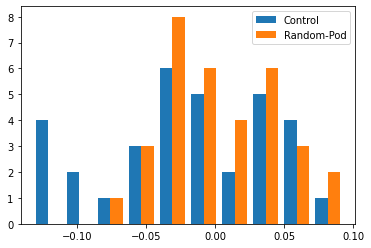

In [5]:
plt.hist([control_attraction, random_attraction], label=["Control", "Random-Pod"])
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


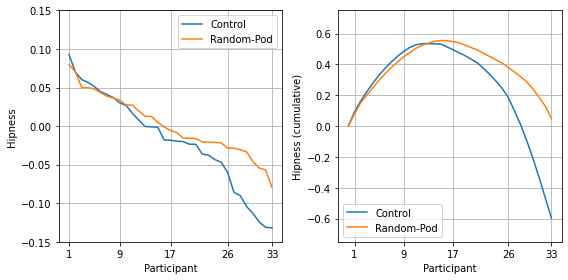

In [19]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
x = np.array(sorted(control_attraction,reverse=True))
plt.plot(range(1, len(x)+1), x, label="Control")
x = np.array(sorted(random_attraction, reverse=True))
plt.plot(range(1, len(x)+1), x, label="Random-Pod")
plt.xticks([1, 9, 17, 26, 33])
plt.ylim([-0.15, 0.15])
plt.xlabel('Participant')
plt.ylabel('Hipness')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
x = np.array(sorted(control_attraction,reverse=True))
plt.plot([0] + [sum(x[:i+1]) for i, xi in enumerate(x)], label="Control")
x = np.array(sorted(random_attraction, reverse=True))
plt.plot([0] + [sum(x[:i+1]) for i, xi in enumerate(x)], label="Random-Pod")
plt.xticks([1, 9, 17, 26, 33])
plt.ylim([-0.75, 0.75])
plt.xlabel('Participant')
plt.ylabel('Hipness (cumulative)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('fig-hipness.eps')

In [7]:
control_dict = attraction_all(control_preferences)
random_dict = attraction_all(random_preferences)


In [8]:
control_sorted = sorted(control_dict.items(), key=lambda x: x[1])
random_sorted = sorted(random_dict.items(), key=lambda x: x[1])


In [9]:
control_low = control_sorted[0][0]
control_high = control_sorted[-1][0]
random_low = random_sorted[0][0]
random_high = random_sorted[-1][0]

In [10]:
print(control_preferences[control_low].display())
print(control_preferences[control_high].display())

	prop2	prop1	prop3	prop4	prop6	prop5
	prop1	prop2	prop6	prop4	prop3	prop5
	prop2	prop1	prop3	prop6	prop4	prop5
	prop2	prop1	prop4	prop3	prop6	prop5

	prop4	prop6	prop1	prop5	prop3	prop2
	prop5	prop6	prop1	prop2	prop4	prop3
	prop3	prop2	prop1	prop6	prop5	prop4
	prop4	prop2	prop1	prop5	prop6	prop3



In [11]:
def conformity(participant_id, preferences):
    p = preferences[participant_id]
    conformity_q = []
    for q_id, q in preferences.items():
        if q_id == participant_id:
            # Avoid self-comparison
            continue
        # Calculate distances
        initial = p[0].crossing_dissimilarity(q[0])
        final = p[3].crossing_dissimilarity(q[3])
        dp = p[0].crossing_dissimilarity(p[3])
        dq = q[0].crossing_dissimilarity(q[3])
        # Calculate confority
        try:
            conformity_q.append(-1 * (final - initial) * (dp / (dq + dp)))
        except ZeroDivisionError:
            # Both dq and dp are zero, no contribution to influence of p
            conformity_q.append(0)
    return np.mean(conformity_q)

def conformity_all(preferences):
    results = {}
    for p_id, p in preferences.items():
        results[p_id] = conformity(p_id, preferences)
    return results

In [12]:
control_conformity = list(conformity_all(control_preferences).values())
random_conformity = list(conformity_all(random_preferences).values())


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


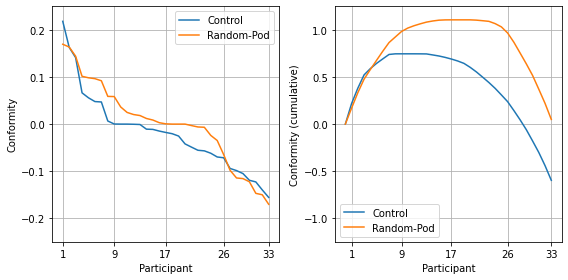

In [17]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
x = np.array(sorted(control_conformity,reverse=True))
plt.plot(range(1, len(x)+1), x, label="Control")
x = np.array(sorted(random_conformity, reverse=True))
plt.plot(range(1, len(x)+1), x, label="Random-Pod")
plt.xlabel('Participant')
plt.ylabel('Conformity')
plt.xticks([1, 9, 17, 26, 33])
plt.ylim([-0.25, 0.25])
plt.grid()
plt.legend()

plt.subplot(1,2,2)
x = np.array(sorted(control_conformity,reverse=True))
plt.plot([0] + [sum(x[:i+1]) for i, xi in enumerate(x)], label="Control")
x = np.array(sorted(random_conformity, reverse=True))
plt.plot([0] + [sum(x[:i+1]) for i, xi in enumerate(x)], label="Random-Pod")
plt.xlabel('Participant')
plt.ylabel('Conformity (cumulative)')
plt.xticks([1, 9, 17, 26, 33])
plt.ylim([-1.25, 1.25])
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('fig-conformity.eps')

In [14]:
sum(control_conformity)

-0.5972465034965032

In [20]:
sum(random_conformity)

0.049388111888111874